In [1]:
import os
print(os.getcwd())
os.chdir('/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/Bigdata/Python/Mini_Project/Mini_Project1[강수량 데이터 분석 및 시각화]/Data')

/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/Bigdata/Python/Mini_Project


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  

In [4]:
All = pd.read_csv('All_Precipitation.csv',encoding = 'cp949')

In [5]:
All

,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자
0,90,속초,1968.1.1,0.0,0.0,1968.1.24,0.0,1968.1.2
1,90,속초,1968.2.1,3.3,2.0,1968.2.29,0.0,1968.2.10
2,90,속초,1968.3.1,8.8,3.3,1968.3.24,NaN,NaN
3,90,속초,1968.4.1,6.9,3.4,1968.4.8,1.4,1968.4.5
4,90,속초,1968.5.1,49.1,31.8,1968.5.18,5.7,1968.5.18
...,...,...,...,...,...,...,...,...
49396,295,남해,2022.4.1,142.1,72.8,2022.4.26,29.0,2022.4.26
49397,295,남해,2022.5.1,6.7,6.0,2022.5.21,6.0,2022.5.21
49398,295,남해,2022.6.1,137.1,47.7,2022.6.5,17.1,2022.6.24
49399,295,남해,2022.7.1,236.5,77.5,2022.7.18,31.4,2022.7.11


# 데이터 확인

In [6]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49401 entries, 0 to 49400
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0      지점번호       49401 non-null  int64  
 1   지점명           49401 non-null  object 
 2   일시            49401 non-null  object 
 3   강수량(mm)       49021 non-null  float64
 4   일최다강수량(mm)    49021 non-null  float64
 5   일최다강수량일자      49021 non-null  object 
 6   1시간최다강수량(mm)  30939 non-null  float64
 7   1시간최다강수량일자    30939 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.0+ MB


## object type을 날짜 데이터로 바꾸기

In [7]:
All['일시'] = pd.to_datetime(All['일시'])

In [8]:
All['일최다강수량일자'] = pd.to_datetime(All['일최다강수량일자'])

In [9]:
All['1시간최다강수량일자'] = pd.to_datetime(All['1시간최다강수량일자'])

In [10]:
# All['최고기온일자'] = pd.to_datetime(All['최고기온일자'])

In [11]:
# All['최저기온일자'] = pd.to_datetime(All['최저기온일자'])

In [12]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49401 entries, 0 to 49400
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0      지점번호       49401 non-null  int64         
 1   지점명           49401 non-null  object        
 2   일시            49401 non-null  datetime64[ns]
 3   강수량(mm)       49021 non-null  float64       
 4   일최다강수량(mm)    49021 non-null  float64       
 5   일최다강수량일자      49021 non-null  datetime64[ns]
 6   1시간최다강수량(mm)  30939 non-null  float64       
 7   1시간최다강수량일자    30939 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(1), object(1)
memory usage: 3.0+ MB


## 날짜 데이터 확인 현재기준(1960~2022년 8월)사이에 데이터가 있어야한다

In [13]:
All['일시'].max()

Timestamp('2022-08-01 00:00:00')

In [14]:
All['일시'].min()

Timestamp('1960-01-01 00:00:00')

In [15]:
All['일최다강수량일자'].max()

Timestamp('2022-08-03 00:00:00')

In [16]:
All['일최다강수량일자'].min()

Timestamp('1960-01-16 00:00:00')

In [17]:
All['1시간최다강수량일자'].max()

Timestamp('2022-08-03 00:00:00')

In [18]:
All['1시간최다강수량일자'].min()

Timestamp('1960-01-14 00:00:00')

# 결측값 작업

## 결측값 확인

In [19]:
# 결측치 있는지 확인
All.isnull().values.any()

True

In [20]:
# 열(컬럼)별 결측치 확인
All.isnull().any()

   지점번호         False
지점명             False
일시              False
강수량(mm)          True
일최다강수량(mm)       True
일최다강수량일자         True
1시간최다강수량(mm)     True
1시간최다강수량일자       True
dtype: bool

## 결측값 제거

In [21]:
All['강수량(mm)'] = All['강수량(mm)'].fillna(0)

In [22]:
All['일최다강수량(mm)'] = All['일최다강수량(mm)'].fillna(0)

In [23]:
All['1시간최다강수량(mm)'] = All['1시간최다강수량(mm)'].fillna(0)

In [24]:
# All['평균기온(℃)'] = All['평균기온(℃)'].fillna(0)

In [25]:
# All['평균최고기온(℃)'] = All['평균최고기온(℃)'].fillna(0)

In [26]:
# All['최고기온(℃)'] = All['최고기온(℃)'].fillna(0)

In [27]:
# All['평균최저기온(℃)'] = All['평균최저기온(℃)'].fillna(0)

In [28]:
# All['최저기온(℃)'] = All['최저기온(℃)'].fillna(0)

In [29]:
All.isnull().any()

   지점번호         False
지점명             False
일시              False
강수량(mm)         False
일최다강수량(mm)      False
일최다강수량일자         True
1시간최다강수량(mm)    False
1시간최다강수량일자       True
dtype: bool

---

# 지점 검색

## 지점 데이터 출력

In [73]:
area = input("지역 입력(시군구) : ")
All.loc[All['지점명']==area]

지역 입력(시군구) : 밀양


,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,Month,Season
46982,288,밀양,1972-01-01,0.0,0.0,NaT,0.0,NaT,1,4
46983,288,밀양,1973-01-01,47.5,23.3,1973-01-24,4.0,1973-01-24,1,4
46984,288,밀양,1973-02-01,28.8,9.6,1973-02-22,2.5,1973-02-22,2,4
46985,288,밀양,1973-03-01,9.1,4.4,1973-03-09,1.5,1973-03-09,3,1
46986,288,밀양,1973-04-01,162.5,72.2,1973-04-24,19.0,1973-04-24,4,1
...,...,...,...,...,...,...,...,...,...,...
47574,288,밀양,2022-04-01,59.6,37.5,2022-04-26,21.0,2022-04-26,4,1
47575,288,밀양,2022-05-01,3.3,3.3,2022-05-02,2.6,2022-05-02,5,1
47576,288,밀양,2022-06-01,232.8,125.6,2022-06-27,38.4,2022-06-27,6,2
47577,288,밀양,2022-07-01,112.8,68.3,2022-07-18,19.2,2022-07-18,7,2


## 지점 통계량

In [75]:
area = input('지역 입력(시군구): ')
All.loc[All['지점명']==area]['강수량(mm)'].describe()

지역 입력(시군구): 밀양


count    597.000000
mean     101.611055
std      109.346063
min        0.000000
25%       25.400000
50%       61.200000
75%      136.000000
max      695.000000
Name: 강수량(mm), dtype: float64

## 지점별 최대 강수량(상위 30지점)

In [76]:
All_P_Max = All.groupby('지점명',as_index = False)['강수량(mm)'].max().sort_values(by= '강수량(mm)', ascending=False).head(30)

## 지점별 최대 강수량 그래프(상위30지점)

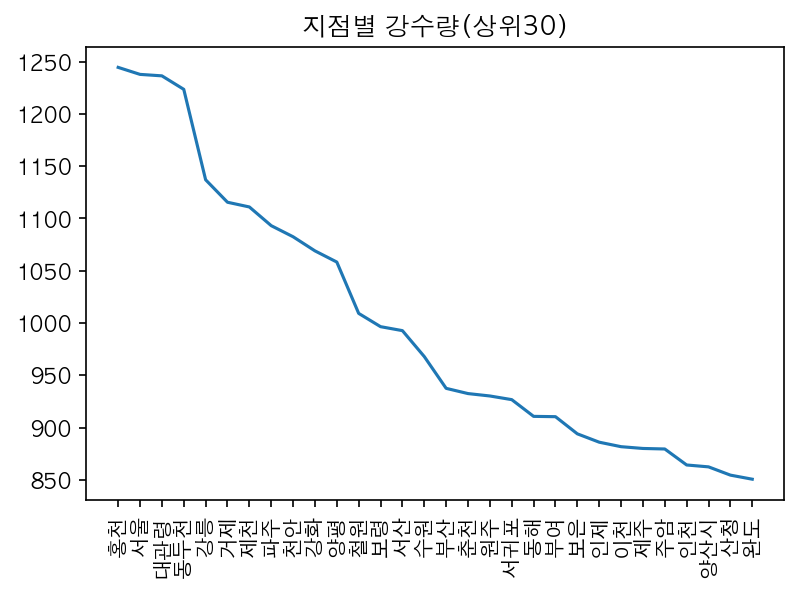

In [77]:
plt.rc('font', family = 'AppleGothic') # 그래프 글꼴
plt.figure(dpi = 150) # 그래프 크기
plt.plot(range(30),All_P_Max['강수량(mm)'])
plt.title('지점별 강수량(상위30)')
plt.xticks(range(30),All_P_Max['지점명'],rotation = 90)
plt.show()

## 지점별 최대 강수량(하위 30개 지점)

In [34]:
All_P_Min = All.groupby('지점명',as_index = False)['강수량(mm)'].max().sort_values(by = '강수량(mm)').head(30)

## 지점별 최대 강수량(하위 30개 지점)

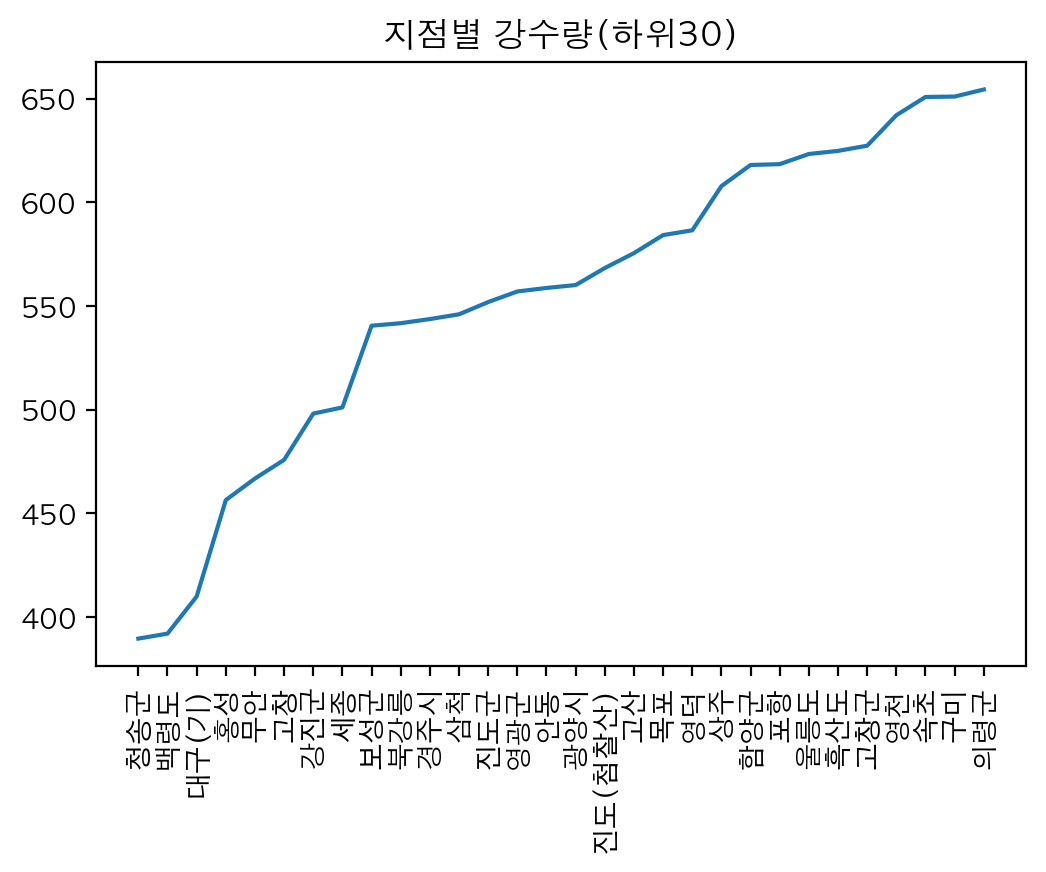

In [35]:
plt.rc('font',family = 'AppleGothic')  # 그래츠 글꼴
plt.figure(dpi= 200) # 그래프 크기
plt.plot(range(30),All_P_Min['강수량(mm)'])
plt.title('지점별 강수량(하위30)')
plt.xticks(range(30),All_P_Min['지점명'],rotation = 90)
plt.show()

## ==> 1960년~2022년까지 데이터중 최대 강수량은 서울에 제일 높고 청송이 제일 낮다
---

In [82]:
year_y = int(input('년도 입력 : '))
All.loc[All['일시'].dt.year==year_y]

년도 입력 : 2021


,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,Month,Season
636,90,속초,2021-01-01,0.0,0.0,2021-01-31,0.0,NaT,1,4
637,90,속초,2021-02-01,5.0,4.8,2021-02-27,0.0,NaT,2,4
638,90,속초,2021-03-01,104.2,73.4,2021-03-01,0.0,NaT,3,1
639,90,속초,2021-04-01,97.2,40.5,2021-04-03,5.9,2021-04-03,4,1
640,90,속초,2021-05-01,154.9,67.0,2021-05-16,12.1,2021-05-16,5,1
...,...,...,...,...,...,...,...,...,...,...
49388,295,남해,2021-08-01,473.2,185.7,2021-08-21,73.5,2021-08-21,8,2
49389,295,남해,2021-09-01,164.6,56.2,2021-09-29,26.4,2021-09-29,9,3
49390,295,남해,2021-10-01,43.6,18.2,2021-10-10,11.4,2021-10-10,10,3
49391,295,남해,2021-11-01,53.5,31.3,2021-11-08,0.0,NaT,11,3


# 년도 통계량

In [83]:
year_y = int(input('년도 입력 : '))
All.loc[All['일시'].dt.year==year_y]['강수량(mm)'].describe()

년도 입력 : 2021


count    1140.000000
mean      106.432632
std       101.368726
min         0.000000
25%        35.275000
50%        84.150000
75%       143.125000
max       692.400000
Name: 강수량(mm), dtype: float64

# 년도별 데이터(상위 30)

In [84]:
All_Y_Max = All.groupby('일시',as_index = False)['강수량(mm)'].max().sort_values(by = '강수량(mm)',ascending = False).head(30)

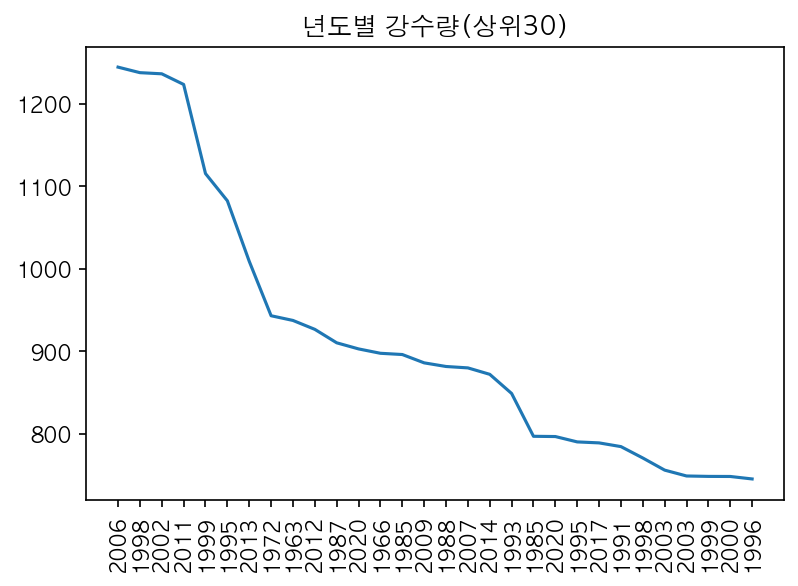

In [86]:
plt.rc('font', family = 'AppleGothic') # 그래프 글꼴
plt.figure(dpi = 150) # 그래프 크기
plt.plot(range(30),All_Y_Max['강수량(mm)'])
plt.title('년도별 강수량(상위30)')
plt.xticks(range(30),All_Y_Max['일시'].dt.year,rotation = 90)
plt.show()

# 년도별 데이터(하위 30)

In [87]:
All_Y_Min = All.groupby('일시',as_index = False)['강수량(mm)'].max().sort_values(by = '강수량(mm)',ascending = True).head(30)

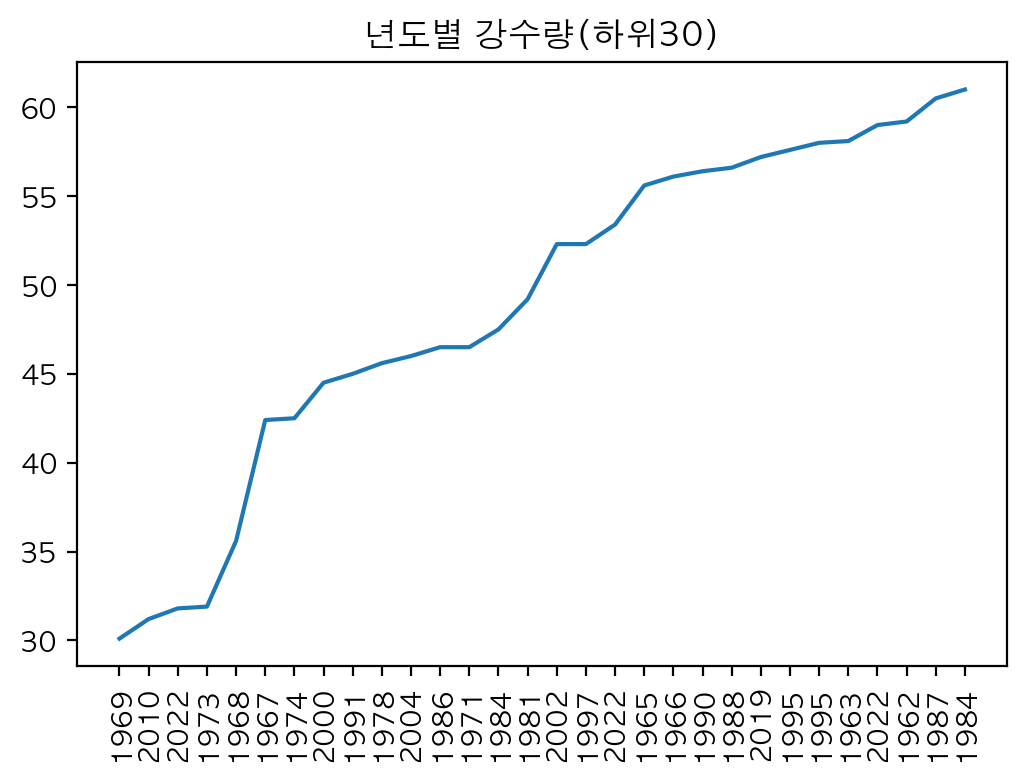

In [88]:
plt.rc('font', family = 'AppleGothic') # 그래프 글꼴
plt.figure(dpi = 200) # 그래프 크기
plt.plot(range(30),All_Y_Min['강수량(mm)'])
plt.title('년도별 강수량(하위30)')
plt.xticks(range(30),All_Y_Min['일시'].dt.year,rotation = 90)
plt.show()

## => 2006년 7월에 가장 많은 비가 내렸고 1969년 10월에 가장 비가 내리지 않았다.

---
# 지역 검색

## 입력한 년도 년도별 강수량 평균

In [90]:
Point = input('지역 입력(시군구): ')
All_P = All.loc[(All['지점명'] == Point)]

지역 입력(시군구): 밀양


In [91]:
All_P_G = All_P.groupby(All_P['일시'].dt.year)['강수량(mm)']
All_P_G

## 입력한 데이터(지역) 년도별 그래프

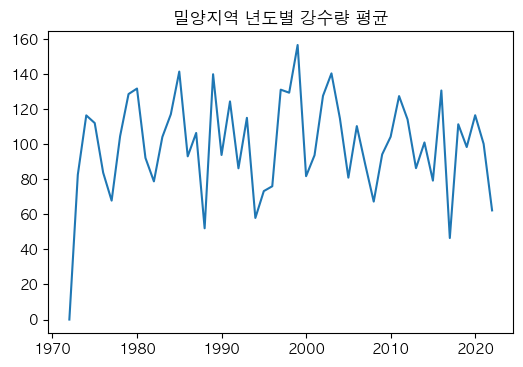

In [92]:
plt.rc('font',family = 'AppleGothic')
plt.figure(dpi = 100)
plt.title(Point+"지역 년도별 강수량 평균")
plt.plot(All_P_G.mean())
plt.show()

---
# 지역, 년도 검색

## 입력한 년도, 월별 강수량 평균

### 년도만

In [93]:
# All_P = All.groupby('지점명',as_index = False)['강수량(mm)']
# while(True):
#     A = input('지역 입력(시군구): ')
#     if (A in All['지점명']) == True :
#         area = A
#         break
#     else:
#         print('error')
Point = input('지역 입력(시군구): ')
day_y = int(input('날짜 입력 : '))
All_P_Y = All.loc[(All['지점명'] == Point) & (All['일시'].dt.year == day_y)]
All_P_Y

지역 입력(시군구): 밀양
날짜 입력 : 2021


,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,Month,Season
47559,288,밀양,2021-01-01,16.6,14.3,2021-01-26,0.0,NaT,1,4
47560,288,밀양,2021-02-01,23.1,14.7,2021-02-01,0.0,NaT,2,4
47561,288,밀양,2021-03-01,134.3,46.6,2021-03-01,0.0,NaT,3,1
47562,288,밀양,2021-04-01,66.7,28.2,2021-04-03,10.6,2021-04-04,4,1
47563,288,밀양,2021-05-01,107.9,28.5,2021-05-16,17.5,2021-05-28,5,1
47564,288,밀양,2021-06-01,68.9,24.3,2021-06-11,11.8,2021-06-23,6,2
47565,288,밀양,2021-07-01,308.2,87.9,2021-07-06,23.0,2021-07-07,7,2
47566,288,밀양,2021-08-01,302.3,121.6,2021-08-21,32.0,2021-08-21,8,2
47567,288,밀양,2021-09-01,60.9,19.1,2021-09-29,9.4,2021-09-29,9,3
47568,288,밀양,2021-10-01,61.2,40.7,2021-10-11,7.3,2021-10-11,10,3


In [94]:
All_P_Y_G = All_P_Y.groupby(All_P_Y['일시'].dt.month)['강수량(mm)'].mean()
All_P_Y_G.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='일시')

### 입력한 데이터( 지역, 년도) 그래프


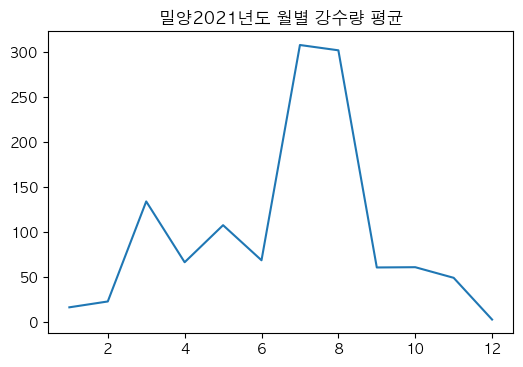

In [95]:
plt.rc('font',family = 'AppleGothic')
plt.figure(dpi = 100)
plt.title(Point+str(day_y)+"년도 월별 강수량 평균")
plt.plot(All_P_Y_G)
plt.show()

---
## 강수량 비교(지점, 년 입력) -> 월별 강수량 비교

In [96]:
area1 = input('지역 입력(시군구): ')
All_A1 = All.loc[All['지점명']==area1]
All_A1

지역 입력(시군구): 밀양


,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,Month,Season
46982,288,밀양,1972-01-01,0.0,0.0,NaT,0.0,NaT,1,4
46983,288,밀양,1973-01-01,47.5,23.3,1973-01-24,4.0,1973-01-24,1,4
46984,288,밀양,1973-02-01,28.8,9.6,1973-02-22,2.5,1973-02-22,2,4
46985,288,밀양,1973-03-01,9.1,4.4,1973-03-09,1.5,1973-03-09,3,1
46986,288,밀양,1973-04-01,162.5,72.2,1973-04-24,19.0,1973-04-24,4,1
...,...,...,...,...,...,...,...,...,...,...
47574,288,밀양,2022-04-01,59.6,37.5,2022-04-26,21.0,2022-04-26,4,1
47575,288,밀양,2022-05-01,3.3,3.3,2022-05-02,2.6,2022-05-02,5,1
47576,288,밀양,2022-06-01,232.8,125.6,2022-06-27,38.4,2022-06-27,6,2
47577,288,밀양,2022-07-01,112.8,68.3,2022-07-18,19.2,2022-07-18,7,2


In [97]:
Point1 = input('지역 입력(시군구): ')
day_y1 = int(input('날짜입력(년도) : '))
All_P_Y1 = All.loc[(All['지점명'] == Point1) & (All['일시'].dt.year == day_y1)]
print(All_P_Y1)

지역 입력(시군구): 밀양
날짜입력(년도) : 2021
          지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)   일최다강수량일자  1시간최다강수량(mm)  \
47559      288  밀양 2021-01-01     16.6        14.3 2021-01-26           0.0   
47560      288  밀양 2021-02-01     23.1        14.7 2021-02-01           0.0   
47561      288  밀양 2021-03-01    134.3        46.6 2021-03-01           0.0   
47562      288  밀양 2021-04-01     66.7        28.2 2021-04-03          10.6   
47563      288  밀양 2021-05-01    107.9        28.5 2021-05-16          17.5   
47564      288  밀양 2021-06-01     68.9        24.3 2021-06-11          11.8   
47565      288  밀양 2021-07-01    308.2        87.9 2021-07-06          23.0   
47566      288  밀양 2021-08-01    302.3       121.6 2021-08-21          32.0   
47567      288  밀양 2021-09-01     60.9        19.1 2021-09-29           9.4   
47568      288  밀양 2021-10-01     61.2        40.7 2021-10-11           7.3   
47569      288  밀양 2021-11-01     49.4        29.0 2021-11-30           0.0   
47570      288  밀양 20

In [98]:
All_P_Y1_G = All_P_Y1.groupby(All_P_Y1['일시'].dt.month)['강수량(mm)'].mean()
I1 = All_P_Y1_G.index
All_P_Y1_G

일시
1      16.6
2      23.1
3     134.3
4      66.7
5     107.9
6      68.9
7     308.2
8     302.3
9      60.9
10     61.2
11     49.4
12      3.0
Name: 강수량(mm), dtype: float64

In [99]:
Point2 = input('지역 입력(시군구): ')
day_y2 = int(input('비교할 날짜입력(년도) : '))
All_P_Y2 = All.loc[(All['지점명'] == Point2) & (All['일시'].dt.year == day_y2)]
print(All_P_Y2)

지역 입력(시군구): 밀양
비교할 날짜입력(년도) : 2020
          지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)   일최다강수량일자  1시간최다강수량(mm)  \
47547      288  밀양 2020-01-01     78.2        34.1 2020-01-07           0.0   
47548      288  밀양 2020-02-01     61.6        40.9 2020-02-25           0.0   
47549      288  밀양 2020-03-01     36.1        12.9 2020-03-26           0.0   
47550      288  밀양 2020-04-01     44.4        21.7 2020-04-19           5.3   
47551      288  밀양 2020-05-01     50.3        25.5 2020-05-09           4.6   
47552      288  밀양 2020-06-01    204.7        69.5 2020-06-29          20.5   
47553      288  밀양 2020-07-01    403.6        75.4 2020-07-13          23.5   
47554      288  밀양 2020-08-01    197.2        92.7 2020-08-08          21.7   
47555      288  밀양 2020-09-01    236.0        78.1 2020-09-02          33.0   
47556      288  밀양 2020-10-01     13.6        10.4 2020-10-21           2.5   
47557      288  밀양 2020-11-01     68.0        62.7 2020-11-19           0.0   
47558      288  밀

In [100]:
All_P_Y2_G = All_P_Y2.groupby(All_P_Y2['일시'].dt.month)['강수량(mm)'].mean()
I2 = All_P_Y2_G.index
All_P_Y2_G 

일시
1      78.2
2      61.6
3      36.1
4      44.4
5      50.3
6     204.7
7     403.6
8     197.2
9     236.0
10     13.6
11     68.0
12      5.1
Name: 강수량(mm), dtype: float64

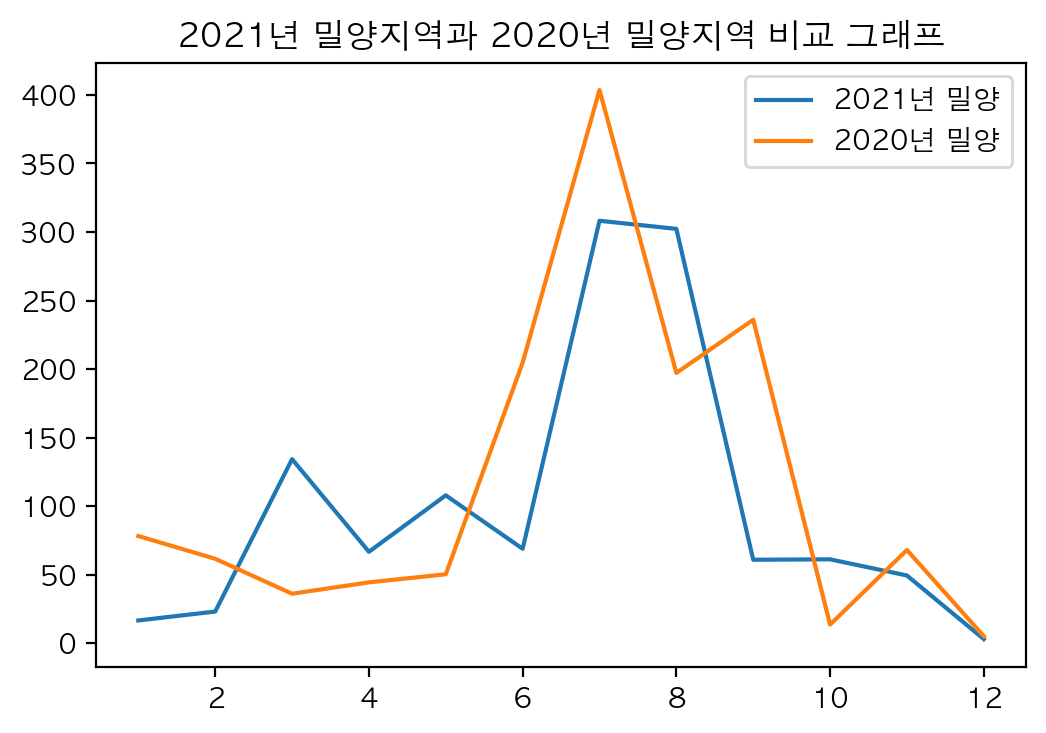

In [101]:
plt.rc('font', family='AppleGothic')
plt.figure(dpi = 200)
plt.title(str(day_y1)+"년 "+Point1+"지역과 "+str(day_y2)+"년 "+Point2+"지역"+" 비교 그래프")
plt.plot(I1,All_P_Y1_G,label = str(day_y1)+"년 "+Point1)
plt.plot(I2,All_P_Y2_G,label = str(day_y2)+"년 "+Point2)
plt.legend()
plt.show()

----

# 계절별 강수량 평균 파이차트

In [53]:
All

,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자
0,90,속초,1968-01-01,0.0,0.0,1968-01-24,0.0,1968-01-02
1,90,속초,1968-02-01,3.3,2.0,1968-02-29,0.0,1968-02-10
2,90,속초,1968-03-01,8.8,3.3,1968-03-24,0.0,NaT
3,90,속초,1968-04-01,6.9,3.4,1968-04-08,1.4,1968-04-05
4,90,속초,1968-05-01,49.1,31.8,1968-05-18,5.7,1968-05-18
...,...,...,...,...,...,...,...,...
49396,295,남해,2022-04-01,142.1,72.8,2022-04-26,29.0,2022-04-26
49397,295,남해,2022-05-01,6.7,6.0,2022-05-21,6.0,2022-05-21
49398,295,남해,2022-06-01,137.1,47.7,2022-06-05,17.1,2022-06-24
49399,295,남해,2022-07-01,236.5,77.5,2022-07-18,31.4,2022-07-11


## 계절 변수 생성

In [102]:
All['Month'] = All['일시'].dt.month

In [103]:
All['Month'] 

0        1
1        2
2        3
3        4
4        5
        ..
49396    4
49397    5
49398    6
49399    7
49400    8
Name: Month, Length: 49401, dtype: int64

In [104]:
def get_category(month):
    cat = ''
    if  month <= 2: cat = 4
    elif month <= 5: cat = 1
    elif month <= 8: cat = 2
    elif month <= 11: cat = 3
    else : cat = 4
    
    return cat

All['Season'] = All['Month'].apply(lambda x : get_category(x))
All[['Month','Season']].head(12)

,Month,Season
0,1,4
1,2,4
2,3,1
3,4,1
4,5,1
5,6,2
6,7,2
7,8,2
8,9,3
9,10,3


In [105]:
Point = input('지역 입력(시군구) : ')
day_y = int(input('날짜 입력 : '))
All_P_Y = All.loc[(All['지점명'] == Point) & (All['일시'].dt.year == day_y)]
All_P_Y

지역 입력(시군구) : 밀양
날짜 입력 : 2021


,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,Month,Season
47559,288,밀양,2021-01-01,16.6,14.3,2021-01-26,0.0,NaT,1,4
47560,288,밀양,2021-02-01,23.1,14.7,2021-02-01,0.0,NaT,2,4
47561,288,밀양,2021-03-01,134.3,46.6,2021-03-01,0.0,NaT,3,1
47562,288,밀양,2021-04-01,66.7,28.2,2021-04-03,10.6,2021-04-04,4,1
47563,288,밀양,2021-05-01,107.9,28.5,2021-05-16,17.5,2021-05-28,5,1
47564,288,밀양,2021-06-01,68.9,24.3,2021-06-11,11.8,2021-06-23,6,2
47565,288,밀양,2021-07-01,308.2,87.9,2021-07-06,23.0,2021-07-07,7,2
47566,288,밀양,2021-08-01,302.3,121.6,2021-08-21,32.0,2021-08-21,8,2
47567,288,밀양,2021-09-01,60.9,19.1,2021-09-29,9.4,2021-09-29,9,3
47568,288,밀양,2021-10-01,61.2,40.7,2021-10-11,7.3,2021-10-11,10,3


In [106]:
All_P_Y_G = All_P_Y.groupby('Season')['강수량(mm)'].mean()
All_P_Y_G

Season
1    102.966667
2    226.466667
3     57.166667
4     14.233333
Name: 강수량(mm), dtype: float64

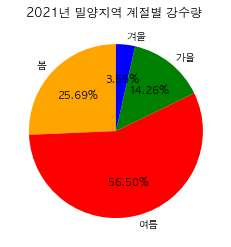

In [107]:
plt.rc('font',family = 'AppleGothic')
plt.figure()
plt.pie(All_P_Y_G,
       labels = ['봄','여름','가을','겨울'],
        autopct = '%.2f%%',
        colors = ['orange','red','green','blue'],
        startangle = 90
       )
plt.title(str(day_y)+"년 "+Point+"지역 계절별 강수량 ")
plt.show()